In [11]:
from timeit import default_timer as timer
import numpy as np
import time
import pandas as pd
import matplotlib as plt

In [4]:
bets1 = [  # lowest config possible
    0.00000001,
    0.00000004,
    0.0000001,
    0.0000005,
    0.00000150,
    0.00000500,
    0.00001000
]
bets2 = [  # 2 is 10x 1
    0.0000001,
    0.0000004,
    0.000001,
    0.000005,
    0.0000150,
    0.0000500,
    0.0001000
]

In [2]:
if False:
    # options
    max_seeds = 100
    max_rolls = 100000  # 100k is around 8-24 hours of fastplay
    cur_losses = 0
    seed_wins = 0
    num_rolls = []
    start_position = np.random.randint(1, 100000000)

    for seed in range(start_position, start_position+max_seeds):
        # seed data and timer
        np.random.seed(seed)
        start_time = timer()

        start_bal = cur_bal = 0.001  # 10$ reasonable start
        # actual Play
        for index in range(max_rolls):
            # make bets
            bets = [  # this appears to be working, a function of cur_bal
                0.00000001,
                float('{:.8f}'.format(cur_bal * 0.001)),
                float('{:.8f}'.format(cur_bal * 0.002)),
                float('{:.8f}'.format(cur_bal * 0.005)),
                float('{:.8f}'.format(cur_bal * 0.01)),
                float('{:.8f}'.format(cur_bal * 0.05)),
                float('{:.8f}'.format(cur_bal * 0.12)),
                float('{:.8f}'.format(cur_bal * 0.3)),
            ]

            # if Winning... Stop
            if (cur_bal / start_bal - 1)*100 > 10000 or index==max_rolls-1:
                print('Seed: {}, Num_Rolls {}, Balance: {:.8f} | Profit: {:.2f}%'.format(
                    seed, index, cur_bal, (cur_bal/start_bal-1)*100))
                #print('Won The Day!')
                seed_wins += 1
                num_rolls.append(index)
                break

            # get bet
            if cur_losses < len(bets):
                bet = bets[cur_losses]
            else:
                bet = bets[0]
            if bet < bets[0]:  # dont bet less than 8 decimal places
                bet = bets[0]

            # if Losing ... Stop
            if cur_bal <= 0:
                break
            if bet >= cur_bal:
                #print('Seed: {}, Num_Rolls {}, Balance: {:.8f} | Profit: {:.2f}%'.format(
                #    seed, index, cur_bal, (cur_bal/start_bal-1)*100))
                #print('Game Over man!')
                break

            ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  MAKE PLAY
            roll = np.random.randint(1, 10000)
            win = True if roll < 3900 else False  ## 3900/10000 appears to be a good handicap
            ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

            # fix balance
            if win:
                cur_bal += bet * 2
                cur_losses = 0
            else:
                cur_bal -= bet
                cur_losses += 1
            # /actual play
        # seed stuff
        seed_time = timer() - start_time
        print('Seed_time: {:.2f}'.format(seed_time), end='\r')  # you will see this a lot if losing
    # Finished All Seeds
    print('Won {}/{} Seeds'.format(seed_wins,max_seeds))
    if seed_wins:  # if won anything.
        print('Avg # of rolls to 1000%: {}'.format(int(np.array(num_rolls).mean())))

Seed: 77134684, Num_Rolls 24820, Balance: 0.10117907 | Profit: 10017.91%
Max_L: 17
Max_W: 10
15199time: 0.15
9621
Won 1/100 Seeds
Avg # of rolls to 1000%: 24820


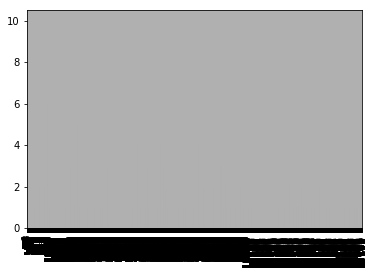

In [24]:
# options
max_seeds = 100
max_rolls = 100000  # 100k is around 8-24 hours of fastplay

seed_wins = 0
num_rolls = []
start_position = np.random.randint(1, 100000000)

for seed in range(start_position, start_position+max_seeds):
    cur_wins = 0
    max_wins = 0
    cur_losses = 0
    max_losses = 0

    win_streak = []
    loss_streak = []
    
    # seed data and timer
    np.random.seed(seed)
    start_time = timer()

    start_bal = cur_bal = 0.001  # 10$ reasonable start
    # actual Play
    for index in range(max_rolls):
        # make bets
        bets = [  # this appears to be working, a function of cur_bal
            0.00000001,
            float('{:.8f}'.format(cur_bal * 0.001)),
            float('{:.8f}'.format(cur_bal * 0.002)),
            float('{:.8f}'.format(cur_bal * 0.005)),
            float('{:.8f}'.format(cur_bal * 0.01)),
            float('{:.8f}'.format(cur_bal * 0.05)),
            float('{:.8f}'.format(cur_bal * 0.12)),
            float('{:.8f}'.format(cur_bal * 0.3)),
        ]

        # if Winning... Stop
        if (cur_bal / start_bal - 1)*100 > 10000 or index==max_rolls-1:
            print('Seed: {}, Num_Rolls {}, Balance: {:.8f} | Profit: {:.2f}%'.format(
                seed, index, cur_bal, (cur_bal/start_bal-1)*100))
            print('Max_L: {}'.format(max_losses))
            print('Max_W: {}'.format(max_wins))
            #print('Won The Day!')
            seed_wins += 1
            num_rolls.append(index)
            break

        # get bet
        if cur_losses < len(bets):
            bet = bets[cur_losses]
        else:
            bet = bets[0]
        if bet < bets[0]:  # dont bet less than 8 decimal places
            bet = bets[0]

        # if Losing ... Stop
        if cur_bal <= 0:
            break
        if bet >= cur_bal:
            #print('Seed: {}, Num_Rolls {}, Balance: {:.8f} | Profit: {:.2f}%'.format(
            #    seed, index, cur_bal, (cur_bal/start_bal-1)*100))
            #print('Game Over man!')
            break

        ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  MAKE PLAY
        roll = np.random.randint(1, 10000)
        win = True if roll < 3900 else False  ## 3900/10000 appears to be a good handicap
        ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

        # fix balance
        if win:
            loss_streak.append(cur_losses)
            cur_bal += bet * 2
            cur_losses = 0
            cur_wins += 1
        else:
            win_streak.append(cur_wins)
            cur_bal -= bet
            cur_losses += 1
            cur_wins = 0

        # fix maxes
        if cur_losses > max_losses:
            max_losses = cur_losses
        if cur_wins > max_wins:
            max_wins = cur_wins
        # /actual play
    # seed stuff
    seed_time = timer() - start_time
    print('Seed_time: {:.2f}'.format(seed_time), end='\r')  # you will see this a lot if losing
    print(len(win_streak))
    print(len(loss_streak))
    wins = pd.Series(win_streak)
    # losses = pd.Series(loss_streak).apply(lambda x: x*-1)
    wins.plot.bar(grid=True)
    # losses.plot(grid=True, alpha=.5, kind='bar')
    # plt.show()
    time.sleep(1.5)
    break
# Finished All Seeds
print('Won {}/{} Seeds'.format(seed_wins,max_seeds))
if seed_wins:  # if won anything.
    print('Avg # of rolls to 1000%: {}'.format(int(np.array(num_rolls).mean())))